Link for the code: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

How can we approximate the value of pi using coin tosses? We can use the following method:

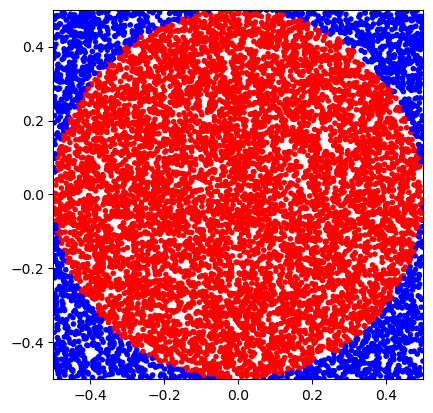

In [13]:
# generating a random number between 0 and 1 using coin tosses
def rand_num(k):
    coin_flips = np.random.randint(2, size=k)
    bin_str = "".join(str(x) for x in coin_flips)
    num = int(bin_str, 2)/((2**k) -1)
    return num

In [28]:
# generating a random sequence of n numbers between 0 and 1
def rand_seq(n, k):
    seq = [rand_num(k) for i in range(n)]
    return seq

In [133]:
# generating a random sequence of n points in the unit square
def points(n, k):
    x = rand_seq(n, k)
    y = rand_seq(n, k)
    points = np.column_stack((x, y))
    center = np.array([0.5, 0.5])
    points =  points - center
    return points

In [134]:
x=points(1000000, 10)

In [93]:
# estimating pi from n points in the unit square
def pi_from_coin_flips(n, k, plot = True):

    pts = points(n, k)
    dists = np.sqrt(np.sum(pts**2, axis=1))
    in_circle = np.sum(dists <= 0.5)
    ratio = in_circle/n
    approx_pi = 4*ratio

    # plot the points   
    if plot == True:
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-0.5, 0.5)
        ax.scatter(pts[:,0], pts[:,1], c=dists <= 0.5, cmap='bwr', marker = '.')
        plt.show()

    
    return approx_pi

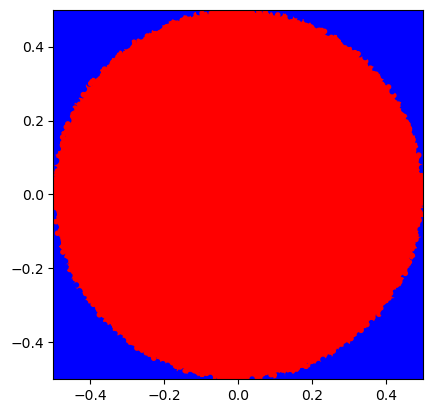

3.141

In [94]:
pi_from_coin_flips(1000000, 20)

In [95]:
# running the experiment m times and averaging the results
def average_pi(n, k, m, plot = False):
    return np.mean([pi_from_coin_flips(n, k, plot) for i in range(m)])

In [97]:
average_pi(10000, 20, 10000)

3.14145972

## Faster?

In [98]:
# generating a random sequence of n numbers between 0 and 1
def faster_rand_seq(n, k):
    coin_flips = np.random.randint(2, size=(n, k))
    powers = np.arange(k - 1, -1, -1)
    powers = 2**powers
    nums = coin_flips.dot(powers)
    seq = nums/((2**k) -1)
    return seq

### Pi from Uniform Random Numbers

In [9]:
# pi from uniform random variables
def pi_from_uniform(n):
    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)
    pts = np.column_stack((x, y))
    dists = np.sqrt(np.sum(pts**2, axis=1))
    in_circle = np.sum(dists <= 1)
    return 4*in_circle/n

In [25]:
# estimate pi from n points in the unit square, generated using uniform random variables
pi_from_uniform(10000000)

3.1414628